Импортим всякое

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import seaborn_image as isns
import warnings
warnings.simplefilter('ignore')
import missingno as msn

Открываем наши драгоценные данные

In [32]:
df = pd.read_csv('11K.csv')

Смотрим форму и колонки нашых данных

In [33]:
print(df.dtypes)
df.shape

author                   object
author_type              object
url                      object
location                 object
deal_type                object
accommodation_type       object
floor                   float64
floors_count            float64
rooms_count             float64
total_meters             object
price                   float64
year_of_construction     object
object_type             float64
house_material_type      object
heating_type            float64
finish_type              object
living_meters            object
kitchen_meters           object
phone                   float64
district                 object
street                   object
house_number             object
underground              object
residential_complex      object
dtype: object


(10582, 24)

Чистим от отрицательных значений

In [34]:
df = df.replace(-1,np.nan) # Убираем все виды плохих или не собранных данных
df = df.replace("-1",np.nan) # Убираем все виды плохих или не собранных данных
df = df.replace(-1.0,np.nan) # Убираем все виды плохих или не собранных данных
df = df.replace("-1.0",np.nan) # Убираем все виды плохих или не собранных данных
df = df.replace("���",0) # Убираем все виды плохих или не собранных данных
df.to_csv("half_11K.csv", index=False) # Тут запись в отдельный файл, дабы поэтапно отслеживать, на каком моменте появляются аномальные действия
# Ещё мы заходим в сохранённый файл и меняем ��� на 0, дабы избежать ошибок (сделал отдельно)

Чекаем корректность данных

<Axes: >

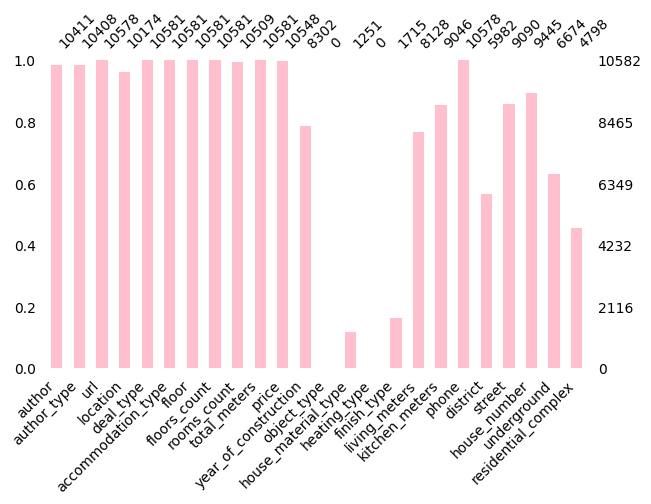

In [35]:
msn.bar(df, figsize=(7,4), fontsize=10, color=(1, 0.75, 0.8))

И убираем наши НЕ любимые данные

In [ ]:
df = pd.read_csv('half_11K.csv')
list = ["Напишите автору","Залоговая недвижимость","Аукцион","Позвоните автору","Подписаться на дом"] # Эти данные нужно стереть
for obj in list: df = df.replace(obj, np.nan) # Стираем
list1 = ["total_meters","living_meters","kitchen_meters"] # Данные, которые мы очистим от метров в квадрате и придадим значение float для математических расчетов
del df['author'] # Не надо
del df['author_type'] # Не надо
del df['accommodation_type'] # Это тип хаты
del df['deal_type'] # Тип сделки, у нас только продажа
del df['residential_complex'] # Много пропущено и не особо надо
del df['heating_type'] # Подогрев, нигде не указан
del df['object_type'] # Чет ваще не нужная штука
del df['phone'] # звонить для аналитики не нужно
list = ["price","year_of_construction","floor","floors_count","rooms_count"] # Создаём лист с данными, которые нам нужны в INT
for obj in list:
    df[obj] = df[obj].fillna(0) # Заполняем пустоты нулями
    df[obj] = df[obj].astype(int) # Оформляем INT для чистоты разума
for obj in list1: df[obj] = pd.to_numeric(
    df[obj].str.replace(',', '.').apply(lambda x: x[:-3] if pd.notna(x) else np.nan),
    errors='coerce'
    ).astype('float64')
df.to_csv("tret'_11K.csv", index=False) # Различия между cleaned_11K и tret'_11K - это ручной отброс плохих данных, например, многострочных описаний, которые вписаны в district

Для лучшего эффекта перепроверяем

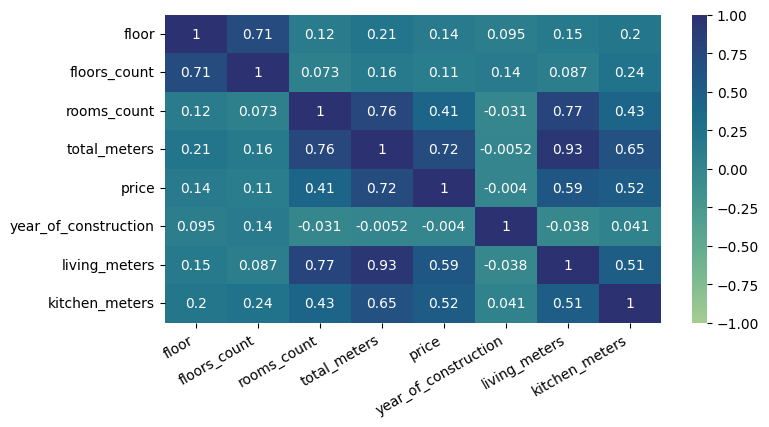

In [6]:
# Связи числовых данных
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(numeric_only=True), cmap='crest', annot=True, vmin=-1, vmax=1)
plt.xticks(rotation=30, ha="right")
plt.show()

In [43]:
# Проверка на отсутствующие данные в процентах
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

url - 0%
location - 4%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 0%
house_material_type - 88%
finish_type - 84%
living_meters - 23%
kitchen_meters - 15%
district - 43%
street - 14%
house_number - 11%
underground - 37%


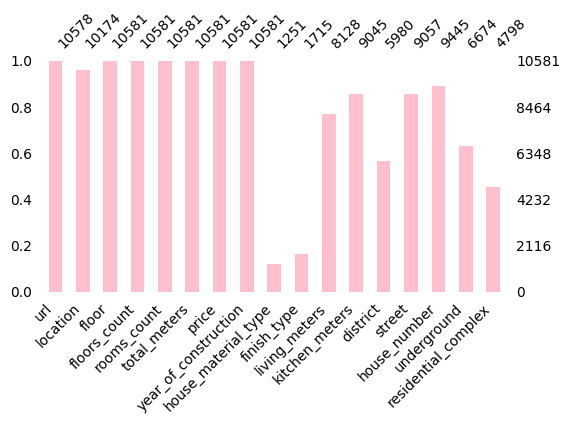

In [7]:
# Проверка на отсутствующие данные в цифрах
msn.bar(df, figsize=(6,3), fontsize=10, color=(1, 0.75, 0.8))
plt.show()

In [57]:
print(df.dtypes)
df.shape

url                      object
location                 object
floor                     int32
floors_count              int32
rooms_count               int32
total_meters            float64
price                     int32
year_of_construction      int32
house_material_type      object
finish_type              object
living_meters           float64
kitchen_meters          float64
district                 object
street                   object
house_number             object
underground              object
dtype: object


(10582, 16)

Теперь раскажу и покажу как готовить данные для графиков

In [12]:
df = pd.read_csv('cleaned_11K.csv')

list_of_cities = df['location'].unique()

def price_for_meter(location):
    city = df[df['location']==location]
    city_price = city['price'].sum();   cleaned_data = city['total_meters'].sum()
    return round(city_price/cleaned_data,2)

with open("dash_info_fifth.csv", 'w', newline='', encoding='UTF-8') as csvfile: # Создаем таблицу, чтобы удобнее было вынимать данные
    fieldnames = ['city', 'price_for_meter'];   writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for city in list_of_cities: writer.writerow({'city': city, 'price_for_meter': price_for_meter(city)})
# Потом вручную удаляем строчку "nan,nan"

И всё, данные для графика готовы

Открываем чистейшие и крутые данные для графиков ниже

In [3]:
df = pd.read_csv('cleaned_11K.csv')
dash_info = pd.read_csv('dash_info_fifth.csv')
dash_info.sort_values(["price_for_meter"], axis=0, ascending=[False], inplace=True)

Выводим графиксы для умного виду

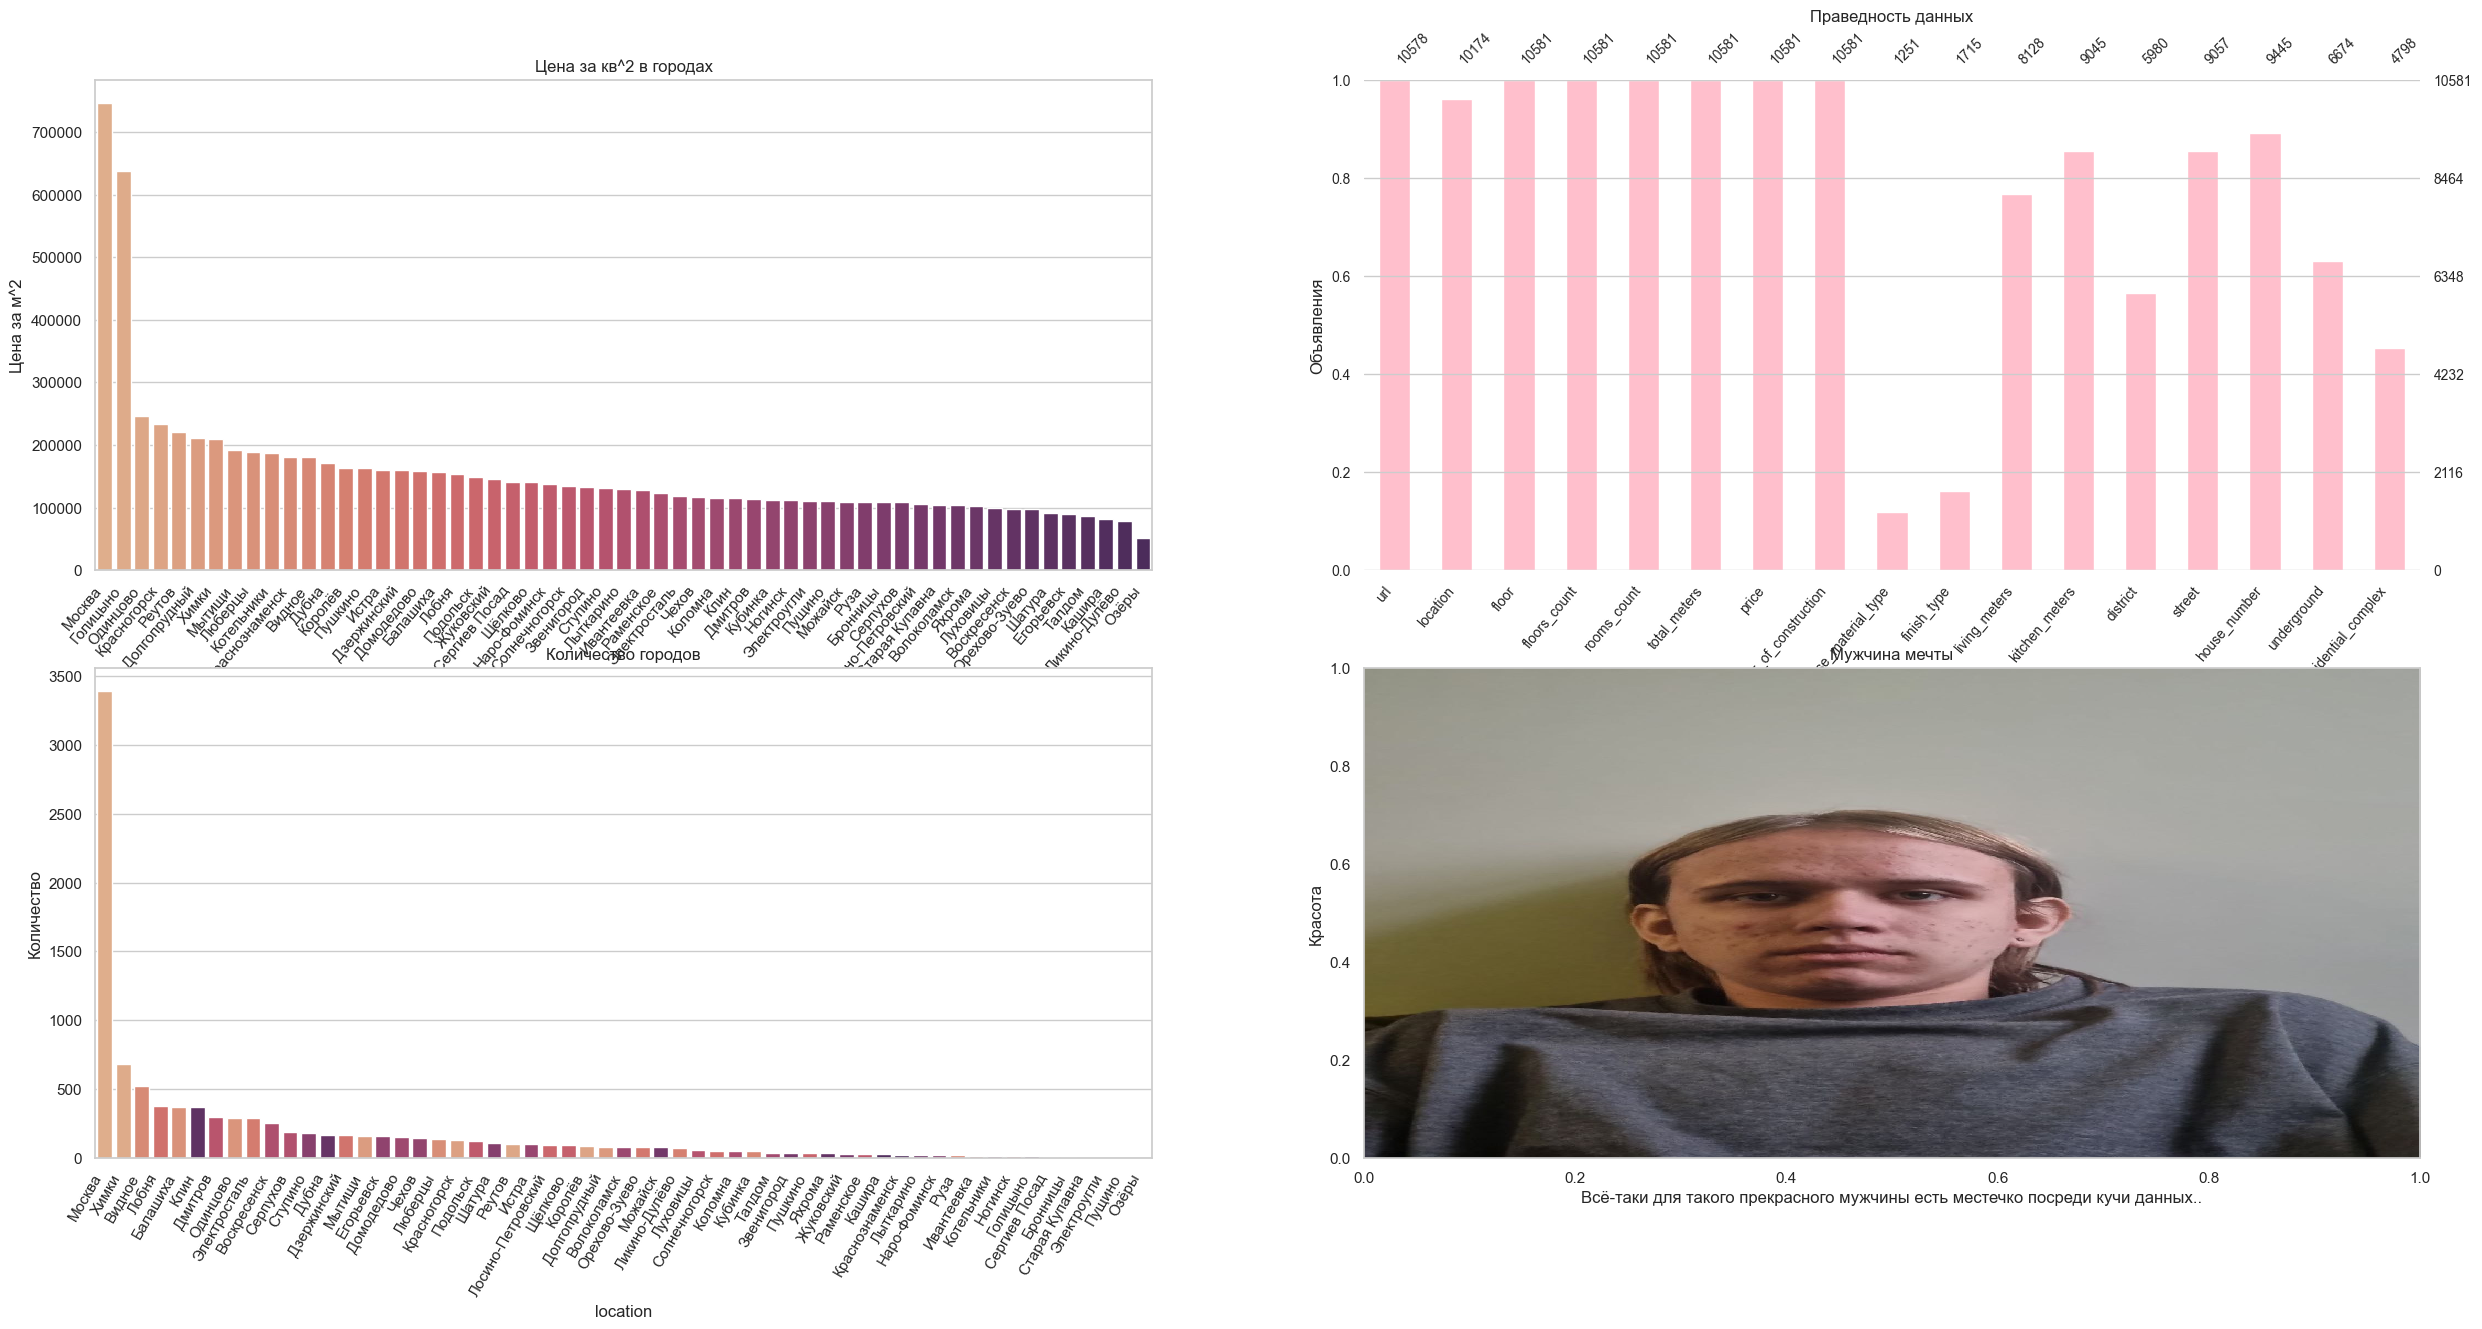

In [67]:
figs, axs = plt.subplots(2,2, figsize=(30,14))

sns.set_theme(style='whitegrid', palette='dark:pink')
sns.barplot(hue='city', legend=False, x='city', y='price_for_meter', data=dash_info, ax=axs[0,0], palette='flare')
axs[0,0].set_title('Цена за кв^2 в городах')
axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(), rotation=50, ha='right')
axs[0,0].set_ylabel('Цена за м^2')
axs[0,0].set_xlabel('Города')

sns.set_theme(style='whitegrid', palette='dark:pink')
sns.countplot(x='location', hue='location', legend=False, data=df, ax=axs[1,0], order=df['location'].value_counts().index, palette='flare')
axs[1,0].set_title('Количество городов')
axs[1,0].set_xticklabels(axs[1,0].get_xticklabels(), rotation=60, ha='right')
axs[1,0].set_ylabel('Количество')

# HeatMap Переехала...
# sns.heatmap(df[df.columns].isnull(), cmap=sns.color_palette(colours), ax=axs[0,1])
msn.bar(df, ax=axs[0,1], fontsize=10, color=(1, 0.75, 0.8))
axs[0,1].set_title('Праведность данных')
axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(), rotation=50, ha='right')
axs[0,1].set_ylabel('Объявления')
axs[0,1].set_xlabel('')
axs[0,1].grid(False)

# Всё-таки для такого прекрасного мужчины есть местечко посреди кучи данных...
bg_img = plt.imread('photo_2024-10-30_18-58-12.jpg')
axs[1,1].set_title('Мужчина мечты')
axs[1,1].imshow(bg_img, extent=[0, 1, 0, 1], aspect='auto')
axs[1,1].set_ylabel('Красота')
axs[1,1].set_xlabel('Всё-таки для такого прекрасного мужчины есть местечко посреди кучи данных..')
axs[1,1].grid(False)

plt.show()

In [37]:
#Создаём файл
df['year_of_construction'] = df['year_of_construction'].fillna(-1) # Это нужно для того, чтобы не портить данные модой, потом вручную удаляем значение -1
df['year_of_construction'] = df['year_of_construction'].astype(int) # для перевода в INT как раз и нужен был -1, вместо других методов
df['year_of_construction'].value_counts().to_csv('years_count.csv') # Записыуем в csv для дальнейшего удобного извлечения
# Вручную удаляем 2025-2028

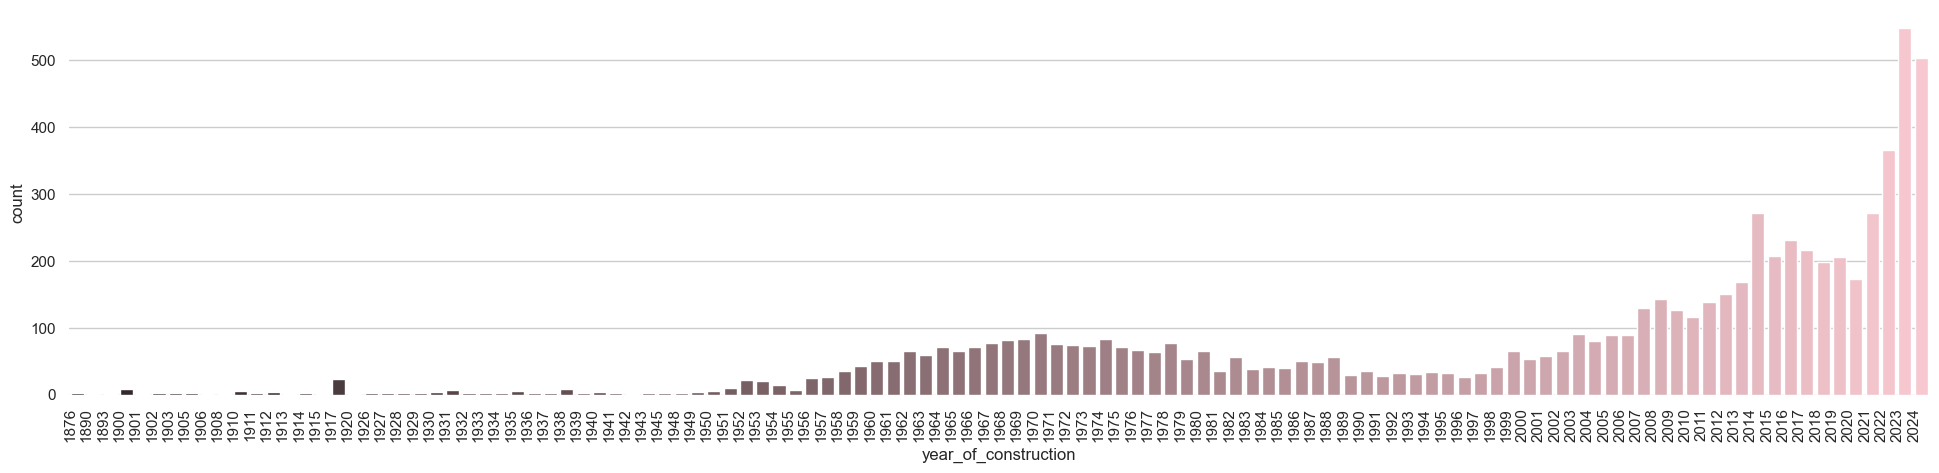

In [57]:
#Рисуем
dash = pd.read_csv('years_count.csv')

plt.subplots(figsize=(24,5))

plot = sns.barplot(x='year_of_construction', y='count', data=dash, palette='dark:pink', orient='v')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, ha='right')
sns.despine(left=True, bottom=True)

plt.show()